### Building Random Forest
Random forests are predictive models that allow for a data driven exploration of many explanatory variables in predicting a response or target variable. Random forests provide importance scores for each explanatory variable and also allow you to evaluate any increases in correct classification with the growing of smaller and larger number of trees.

### Data Description
Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol
       Output variable (based on sensory data):
* 12 - quality (score between 0 and 10)
 
Dataset can be download from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)


### Python Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

rnd_state = 123456

In [2]:
wine_data = pd.read_csv('Data\winequality-red.csv', sep=';')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### EDA of the Data
Visualized the wine data, dimensions is reduced to two after using MDS method and cosine distance.
Plot shows that classes are not properly divided

In [42]:
model_mds = MDS(random_state=rnd_state, n_components=2, dissimilarity='precomputed')
representation = model_mds.fit_transform(pairwise_distances(wine_data.iloc[:, :11], metric='cosine'))

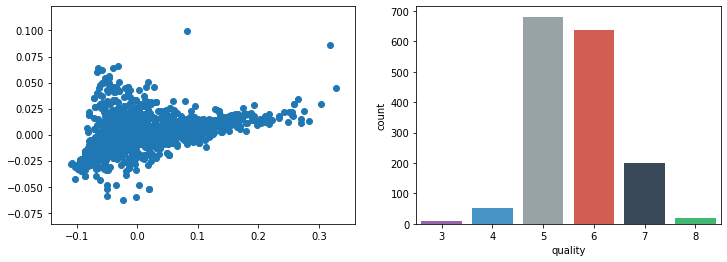

In [43]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(representation[:, 0], representation[:, 1])

plt.subplot(122)
sns.countplot(x='quality', data=wine_data, palette=sns.color_palette(colors));

Data is highly imbalanced so class_weight='balanced' arg is added in classifier.

In [44]:
pred = wine_data.iloc[:, :11]
tar = wine_data.quality

In [45]:
(pred_train, pred_test,
 tar_train, tar_test) = train_test_split(pred, tar, test_size = .3, random_state = rnd_state)

#### Random Forest Classifier 

In [14]:
list_estimators = list(range(1, 50, 5))
rf_scoring = []
for n_estimators in list_estimators:
    clsifier = RandomForestClassifier(random_state = rnd_state, n_jobs = -1, 
                                        class_weight='balanced', n_estimators=n_estimators)
    score = cross_val_score(clsifier, pred_train, tar_train, cv=5, 
                            n_jobs=-1, scoring = 'accuracy') 
    rf_scoring.append(score.mean())

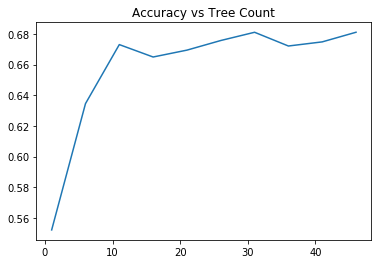

In [16]:
plt.plot(list_estimators, rf_scoring)
plt.title('Accuracy vs Tree Count');

In [22]:
classifier = RandomForestClassifier(random_state = rnd_state, n_jobs = -1, 
                                    class_weight='balanced', n_estimators=12)
classifier.fit(pred_train, tar_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=-1,
                       oob_score=False, random_state=123456, verbose=0,
                       warm_start=False)

In [48]:
# Prediction on Unseen Data
prediction = classifier.predict(pred_test)

In [47]:
# Confusion Matrix
print('Confusion matrix:\n', pd.crosstab(tar_test, prediction, colnames=['Predicted'], 
                                         rownames=['Actual'], margins=True))
# Accuracy
print('\nAccuracy: ', accuracy_score(tar_test, prediction))

Confusion matrix:
 Predicted  4    5    6   7  All
Actual                         
3          0    2    1   0    3
4          0    6    6   1   13
5          2  146   48   0  196
6          1   41  139   8  189
7          0    4   41  28   73
8          0    0    4   2    6
All        3  199  239  39  480

Accuracy:  0.6520833333333333


In [46]:
# Feature Importance Score
feature_importance = pd.Series(classifier.feature_importances_, 
                               index=wine_data.columns.values[:11]).sort_values(ascending=False)
feature_importance

volatile acidity        0.127742
alcohol                 0.117941
citric acid             0.103082
sulphates               0.093555
chlorides               0.092270
total sulfur dioxide    0.087031
pH                      0.082624
free sulfur dioxide     0.078077
density                 0.075475
residual sugar          0.071433
fixed acidity           0.070771
dtype: float64

# ExtraTreesClassifier

In [27]:
et_scoring = []
for n_estimators in list_estimators:
    classifier = ExtraTreesClassifier(random_state = rnd_state, n_jobs = -1, 
                                        class_weight='balanced', n_estimators=n_estimators)
    score = cross_val_score(classifier, pred_train, tar_train, cv=5, 
                            n_jobs=-1, scoring = 'accuracy') 
    et_scoring.append(score.mean())

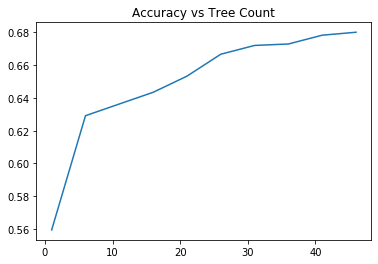

In [28]:
plt.plot(list_estimators, et_scoring)
plt.title('Accuracy vs Tree Count');

In [38]:
classifier = ExtraTreesClassifier(random_state = rnd_state, n_jobs = -1, 
                                    class_weight='balanced', n_estimators=50)
classifier.fit(pred_train, tar_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                     oob_score=False, random_state=123456, verbose=0,
                     warm_start=False)

In [49]:
# Prediction on Unseen Data
prediction = classifier.predict(pred_test)

In [50]:
# Calculating the Confusion Matrix
print('Confusion matrix:\n', pd.crosstab(tar_test, prediction, colnames=['Predicted'], 
                                         rownames=['Actual'], margins=True))
# Calculating the Accuracy
print('\nAccuracy: ', accuracy_score(tar_test, prediction))

Confusion matrix:
 Predicted  4    5    6   7  All
Actual                         
3          0    2    1   0    3
4          0    6    6   1   13
5          2  146   48   0  196
6          1   41  139   8  189
7          0    4   41  28   73
8          0    0    4   2    6
All        3  199  239  39  480

Accuracy:  0.6520833333333333


In [51]:
# Feature Importance Score
feature_importance = pd.Series(classifier.feature_importances_, 
                               index=wine_data.columns.values[:11]).sort_values(ascending=False)
feature_importance

volatile acidity        0.127742
alcohol                 0.117941
citric acid             0.103082
sulphates               0.093555
chlorides               0.092270
total sulfur dioxide    0.087031
pH                      0.082624
free sulfur dioxide     0.078077
density                 0.075475
residual sugar          0.071433
fixed acidity           0.070771
dtype: float64

# Insight

Red wine quality (score between 0 and 10).
Below are the explanatory variables were included:
* fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and alcohol.

Explanatory variables having highest importance score (based on the both classifiers):-
* volatile acidity, alcohol, chlorides.

The accuracy of the Random forest is around 65%, on highly unbalanced data.
Estimators Values:-
  Random forest = 12
  ExtraTrees classifier = 50